In [1]:
%reload_ext autoreload
%autoreload 2

In [3]:
from fastai.tabular import *
from fastai import *

## Looking at sample data

In [4]:
path = Path('/mnt/datadrive1/h216520/fastai_v3/data/PUBG'); path

PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/PUBG')

In [3]:
# pubsamp = pd.read_csv('/mnt/datadrive1/h216520/fastai_v3/data/PUBG/train_V2.csv')#, nrows=10000)
# pubsamp_test = pd.read_csv('/mnt/datadrive1/h216520/fastai_v3/data/PUBG/test_V2.csv')#, nrows=10000)
# pubsamp = pd.read_csv('/mnt/datadrive1/h216520/fastai_v3/data/PUBG/train_V2.csv', nrows=10000)
# pubsamp_test = pd.read_csv('/mnt/datadrive1/h216520/fastai_v3/data/PUBG/test_V2.csv', nrows=10000)

# pubsamp.to_feather(f'{path}/train_V2')
# pubsamp_test.to_feather(f'{path}/test_V2')

In [10]:
# !pip install pyarrow==0.09
# !pip install pandas==0.23.0

    100% |████████████████████████████████| 11.7MB 6.2MB/s eta 0:00:01
tensorflow 1.11.0 has requirement setuptools<=39.1.0, but you'll have setuptools 40.4.3 which is incompatible.
spacy 2.0.16 has requirement regex==2018.01.10, but you'll have regex 2018.8.29 which is incompatible.
kaggle 1.5.0 has requirement urllib3<1.23.0,>=1.15, but you'll have urllib3 1.23 which is incompatible.
  Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
# import feather
pubsamp = pd.read_feather(f'{path}/train_V2')
pubsamp_test = pd.read_feather(f'{path}/test_V2')
# pubsamp = feather.read_dataframe(f'{path}/train_V2')
# pubsamp_test = feather.read_dataframe(f'{path}/test_V2')

In [7]:
pubsamp.loc[pubsamp.winPlacePerc.isna(), 'winPlacePerc'] = pubsamp.winPlacePerc.median()

In [8]:
pubsamp[pubsamp.winPlacePerc.isna()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [9]:
pubsamp.shape;pubsamp.columns;pubsamp.dtypes

(4446966, 29)

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [10]:
pubsamp.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [11]:
pubsamp_test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [12]:
pubsamp_test.shape
pubsamp_test.columns

(1934174, 28)

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints'],
      dtype='object')

In [42]:
pubsamp.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


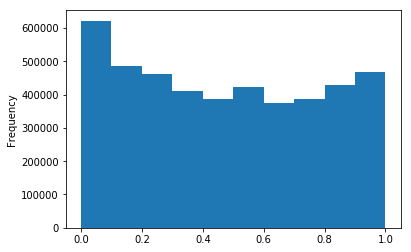

In [54]:
pubsamp.winPlacePerc.plot.hist()

In [57]:
(pubsamp.winPlacePerc == 1).sum()/pubsamp.shape[0]*100

2.86876490623045

In [33]:
train = pubsamp
summ = pd.DataFrame({'Variable':train.columns.values,
                   'dtype':train.dtypes.values,
                   'n_missing':[train[col].shape[0]-train[col].dropna().shape[0] for col in train.columns],
                   'perc_missing':[(train[col].shape[0]-train[col].dropna().shape[0])*100/train[col].shape[0] for col in train.columns],
                   'unique_cnt' : [len(train[col].unique()) for col in train.columns],
                   'unique_values': [(train[col].unique()) if (len(train[col].unique())<10) else 'UniqueVals>10' for col in train.columns],
                    'sample_values':[(train[col].unique()[:10]) for col in train.columns]},
                           index=np.arange(train.shape[1]))

In [38]:
summ.to_csv(f'{path}/train_summary.csv')

In [22]:
# Check if match id are different in train and test sets; same for groupids
len(set(pubsamp.Id) & set(pubsamp_test.Id))
len(set(pubsamp.groupId) & set(pubsamp_test.groupId))
len(set(pubsamp.matchId) & set(pubsamp_test.matchId))
# --> So totally different matches and groups!!??

0

0

0

## Model Pre Steps

### Iter1 with less categorical variables

In [10]:
dep_var = 'winPlacePerc'
cont_names = ['assists', 'boosts', 'damageDealt', 'DBNOs','headshotKills', 'heals',  'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration',  'numGroups', 'rankPoints', 'revives', 'maxPlace',
    'rideDistance', 'roadKills','swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance','weaponsAcquired', 'winPoints', 'killPlace']
cat_names = ['matchType']
procs = [FillMissing, Categorify, Normalize]

data = (TabularList.from_df(pubsamp, cat_names=cat_names, cont_names=cont_names, procs=procs, path=path)
        .split_by_idx(list(np.random.permutation(pubsamp.shape[0]))[:int(pubsamp.shape[0]*.15)])
        .label_from_df(cols=dep_var, label_cls=FloatList)
        .add_test(pubsamp_test)#, label=0)
        .databunch())

In [89]:
data.show_batch(10);data.show_batch(10, ds_type=DatasetType.Valid)

killPlace,matchType,maxPlace,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,target
18.0,squad-fpp,27.0,-0.3973,-0.6449,0.7824,1.1719,1.2853,-0.5110,1.7576,0.6909,0.6421,-0.0304,-0.7902,-0.7302,-1.2121,-0.3487,-0.4045,-0.0478,-0.1476,-0.1425,-0.0854,-0.8601,-1.0826,1.2943,0.07689999788999557
40.0,duo-fpp,48.0,-0.3973,0.5206,-0.7654,-0.5741,-0.3765,-0.1381,-0.8049,-0.5932,-0.7646,-0.4510,1.1343,-0.0431,0.7835,-0.3487,2.9349,-0.0478,-0.1476,-0.1425,-0.0854,0.6472,-0.6756,-0.8200,0.829800009727478
67.0,duo-fpp,48.0,-0.3973,-0.6449,-0.3647,-0.5741,-0.3765,-0.5110,0.8412,-0.5932,-0.7646,-0.4510,0.8638,0.1716,-1.2121,-0.3487,2.3701,-0.0478,-0.0370,5.8252,-0.0854,-0.5086,0.1383,1.2213,0.4043000042438507
63.0,squad-fpp,27.0,-0.3973,0.5206,-0.4168,0.2989,-0.3765,-0.5110,-0.8049,-0.5932,-0.7646,-0.4510,1.5362,-0.7732,0.8622,-0.3487,3.2306,-0.0478,-0.1476,-0.1425,-0.0854,0.3202,2.1731,-0.8200,0.3846000134944916
49.0,squad,31.0,1.3020,-0.0621,0.8943,1.1719,-0.3765,0.2348,1.0452,-0.5932,-0.7646,-0.4510,1.1536,-0.5155,-1.2121,-0.3487,-0.4045,-0.0478,-0.1476,-0.1425,-0.0854,1.8639,-0.2687,1.2051,0.766700029373169
61.0,squad-fpp,26.0,-0.3973,0.5206,-0.7219,-0.5741,-0.3765,-0.1381,1.1855,-0.5932,-0.7646,-0.4510,0.8754,-0.7302,-1.2121,-0.3487,2.9129,-0.0478,-0.1476,-0.1425,-0.0854,1.6036,0.1383,1.3132,0.4000000059604645
48.0,squad-fpp,29.0,-0.3973,0.5206,0.0841,0.2989,-0.3765,-0.1381,-0.8049,-0.5932,-0.7646,-0.4510,1.5285,-0.6444,0.7495,1.7691,0.5435,-0.0478,-0.1476,-0.1425,-0.0854,1.2226,0.9522,-0.8200,0.75
37.0,squad,29.0,-0.3973,-0.6449,-0.7654,-0.5741,-0.3765,-0.5110,-0.8049,-0.5932,-0.7646,-0.4510,0.8483,-0.6873,0.8201,-0.3487,-0.4045,-0.0478,-0.1476,-0.1425,-0.0854,-0.9750,-1.4895,-0.8200,1.0
7.0,squad,29.0,-0.3973,0.5206,0.7578,2.0449,-0.3765,-0.1381,-0.8049,1.9750,3.4556,0.2921,-0.8945,-0.6014,0.7685,1.7691,-0.4045,-0.0478,-0.1476,-0.1425,-0.0854,0.3236,0.1383,-0.8200,0.4643000066280365
74.0,squad,27.0,-0.3973,-0.6449,-0.6527,-0.5741,-0.3765,-0.5110,-0.8049,-0.5932,-0.7646,-0.4510,-0.7284,-0.6873,0.8269,-0.3487,-0.4045,-0.0478,-0.1476,-0.1425,-0.0854,-0.7090,0.1383,-0.8200,0.3077000081539154


killPlace,matchType,maxPlace,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,target
86.0,squad-fpp,27.0,-0.3973,-0.6449,-0.1796,0.2989,-0.3765,-0.5110,-0.8049,-0.5932,-0.7646,-0.4510,1.1884,-0.8161,0.4441,-0.3487,-0.4045,-0.0478,-0.1476,-0.1425,-0.0854,-0.9584,-1.0826,-0.8200,0.07689999788999557
6.0,duo-fpp,49.0,3.0014,1.1034,0.9951,0.2989,-0.3765,0.6077,1.4006,1.3329,0.6421,3.6806,1.8144,0.2575,-1.2121,-0.3487,0.6924,-0.0478,-0.1476,-0.1425,-0.0854,2.5880,0.5452,1.1564,0.958299994468689
79.0,squad,29.0,-0.3973,-0.6449,-0.7654,-0.5741,-0.3765,-0.5110,-0.8049,-0.5932,-0.7646,-0.4510,0.9101,-0.6873,0.6328,-0.3487,0.4066,-0.0478,-0.1476,-0.1425,-0.0854,-0.4274,0.1383,-0.8200,0.1429000049829483
32.0,solo-fpp,98.0,-0.3973,0.5206,-0.0530,-0.5741,-0.3765,-0.5110,-0.8049,0.0488,0.6421,-0.2937,-1.0337,2.2330,0.7957,-0.3487,-0.4045,-0.0478,-0.1476,-0.1425,-0.0854,0.1242,0.1383,-0.8200,0.7113000154495239
59.0,duo-fpp,47.0,-0.3973,-0.6449,-0.7654,-0.5741,-0.3765,-0.5110,-0.8049,-0.5932,-0.7646,-0.4510,1.2309,0.1716,0.8256,-0.3487,-0.4045,-0.0478,-0.1476,-0.1425,-0.0854,0.7216,1.7661,-0.8200,0.6086999773979187
17.0,duo-fpp,46.0,1.3020,-0.6449,-0.5941,0.2989,-0.3765,-0.5110,-0.8049,0.6909,0.6421,-0.2986,-0.8018,0.0428,0.7685,1.7691,-0.4045,-0.0478,-0.1476,-0.1425,-0.0854,-0.7453,0.1383,-0.8200,0.5555999875068665
81.0,solo-fpp,94.0,-0.3973,-0.6449,-0.6917,-0.5741,-0.3765,-0.5110,-0.8049,-0.5932,-0.7646,-0.4510,1.0338,2.1471,0.8256,-0.3487,-0.4045,-0.0478,-0.1476,-0.1425,-0.0854,-0.9575,-1.0826,-0.8200,0.13979999721050262
40.0,squad,26.0,-0.3973,-0.6449,-0.7654,-0.5741,-0.3765,-0.1381,0.7839,-0.5932,-0.7646,-0.4510,-0.5081,-0.7732,-1.2121,-0.3487,-0.4045,-0.0478,-0.1476,-0.1425,-0.0854,0.5467,0.5452,1.1996,1.0
87.0,squad,28.0,1.3020,-0.6449,-0.7654,-0.5741,-0.3765,-0.5110,1.2301,-0.5932,-0.7646,-0.4510,1.5903,-0.6444,-1.2121,1.7691,-0.4045,-0.0478,-0.1476,-0.1425,-0.0854,-0.8879,-0.2687,1.1902,0.03700000047683716
53.0,squad-fpp,30.0,-0.3973,-0.0621,-0.0718,0.2989,-0.3765,-0.1381,-0.8049,-0.5932,-0.7646,-0.4510,1.2116,-0.5585,0.8133,-0.3487,2.8127,-0.0478,-0.1476,-0.1425,-0.0854,1.4853,0.1383,-0.8200,0.7585999965667725


In [11]:
y_range = torch.tensor([-0.2,1.2], device=defaults.device)
print(y_range)

def mae(pred:Tensor, targ:Tensor)->Rank0Tensor:
    "Exp RMSE between `pred` and `targ`."
    error = (pred - targ).abs()
    return error.mean()

# learn = tabular_learner(data, layers=[1000, 500, 250], ps=[0.001,0.01, 0.1], emb_drop=0.04, y_range=y_range, metrics=mae)
learn = tabular_learner(data, layers=[1000, 500], ps=[0.001, 0.01], emb_drop=0.04, y_range=y_range, metrics=mae)

tensor([-0.2000,  1.2000], device='cuda:0')


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


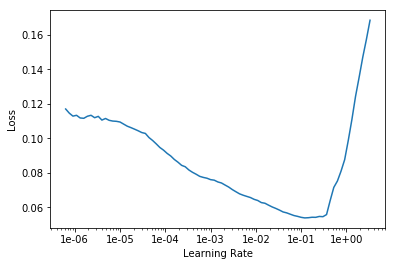

In [13]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,mae
1,0.009247,0.007606,0.339454
2,0.008446,0.007184,0.335437
3,0.007934,0.006740,0.338194
4,0.007674,0.006794,0.339888
5,0.008227,0.006661,0.339874


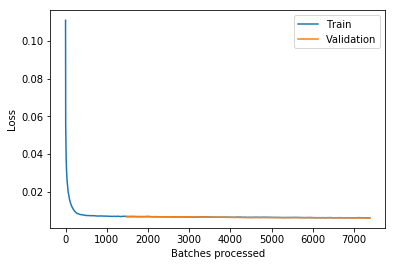

In [38]:
learn.recorder.plot_losses()

In [39]:
learn.predict?

### With most categorical vars

In [101]:
dep_var = 'winPlacePerc'
cont_names = [ 'damageDealt', 'killPoints', 'longestKill', 'rankPoints', 
              'rideDistance', 'swimDistance',  'walkDistance', 'winPoints']
cat_names = ['killPlace', 'matchType', 'maxPlace', 'assists', 'boosts','DBNOs','headshotKills', 'heals','kills',
            'killStreaks', 'matchDuration',  'numGroups', 'revives', 'roadKills','teamKills', 'vehicleDestroys',
            'weaponsAcquired']
procs = [FillMissing, Categorify, Normalize]

data = (TabularList.from_df(pubsamp, cat_names=cat_names, cont_names=cont_names, procs=procs, path=path)
        .split_by_idx(list(np.random.permutation(pubsamp.shape[0]))[:int(pubsamp.shape[0]*.15)])
        .label_from_df(cols=dep_var, label_cls=FloatList)
#         .add_test(pubsamp_test, label=0)
        .databunch(bs=256*10))

In [102]:
y_range = torch.tensor([0,1.1], device=defaults.device)
print(y_range)

def mae(pred:Tensor, targ:Tensor)->Rank0Tensor:
    "Exp RMSE between `pred` and `targ`."
    error = (pred - targ).abs()
    return error.mean()

learn = tabular_learner(data, layers=[1000, 500], ps=[0.001,0.01], emb_drop=0.04, y_range=y_range, metrics=mae)

tensor([0.0000, 1.1000], device='cuda:0')


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


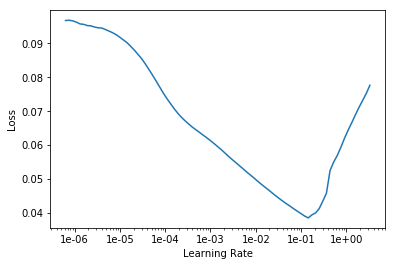

In [103]:
learn.lr_find()
learn.recorder.plot()

In [104]:
learn.fit_one_cycle(5, 1e-5)

epoch,train_loss,valid_loss,mae
1,0.018044,0.017017,0.344969
2,0.009628,0.009117,0.347414
3,0.008137,0.007719,0.346486
4,0.007748,0.007325,0.346543
5,0.007727,0.007281,0.346428
